**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



In [2]:
FD_RES

[1] "/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results"

In [8]:
txt_fdiry = "/data/reddylab/Kuei/work//proj_encode_fcc/results_v4"
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

A001_K562_WSTARRseq 
comparison 
comparison_archive231029 
CRISPRi_FlowFISH 
CRISPRi_Growth_K562_Gersbach 
hic_intact_K562_deep 
hic_intact_K562_ENCSR479XDG 
KS91_K562_ASTARRseq 
LentiMPRA_K562_Nadav 
region 
Tewhey_K562_TileMPRA 


In [9]:
txt_fdiry = "/data/reddylab/Kuei/work//proj_encode_fcc/results_v4/comparison"
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

result.ranknorm.starrmpra.overlap.tsv 
result.score.starrmpra.tsv 


In [27]:
txt_fdiry = "/data/reddylab/Kuei/work//proj_encode_fcc/results_v4/comparison"
txt_fname = "result.ranknorm.starrmpra.overlap.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::rename("Region" = "Peak")

dat_region_ranknorm = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1241    6


Region,ASTARR,WSTARR,TMPRA,LMPRA,Mean
chr11:32870601-32871324,0.1200645,0.0620467,0.1958098,0.2280419,0.1514907
chr11:32874343-32875070,0.1305399,0.2143433,0.3231265,0.0809831,0.1872482
chr11:32884749-32885822,0.0854150,0.2634972,0.5439162,0.7856567,0.4196213


In [13]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [14]:
txt_assay = "CRISPRi_FlowFISH_K562_Riley_JinWoo"

lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc", 
        txt_folder, 
        txt_assay,
        "overlap_score",
        "summary"
    )
    #txt_fname = "result.coverage.score.filtered.tsv"
    txt_fname = "result.coverage.score.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_chcrff_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 941  32

$fcc_astarr_macs_input_union
[1] 1358   32



Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count,⋯,Target_HBG1,Target_HBG2,Target_HBS1L,Target_HDAC6,Target_LMO2,Target_MEF2C,Target_MYB,Target_MYC,Target_NMU,Target_PVT1
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10,100729094,100729750,chr10:100729094-100729750,-0.07708560,-0.155771,-1.82683,1.63462,-1.82683,84,⋯,NA,NA,NA,NA,0.0534315,-0.453715167,NA,NA,-0.1621681,NA
chr10,100743501,100744571,chr10:100743501-100744571,-0.06350497,-0.101530,-1.97401,1.83498,-1.97401,147,⋯,NA,NA,NA,NA,-0.1640059,0.159182286,NA,NA,-0.1338784,NA
chr10,100745413,100745741,chr10:100745413-100745741,0.08003521,0.111189,2.60601,2.60601,-2.44093,42,⋯,NA,NA,NA,NA,-0.1335742,-0.004853833,NA,NA,0.2845222,NA


In [21]:
txt = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_chcrff_import
dat = lst[[txt]]
dat_region_score_chcrff_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1358   32


Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count,Mean_Neg,Mean_Pos,Target_CAPRIN1,Target_CAT,Target_CD164,Target_ERP29,Target_FADS1,Target_FADS2,Target_FADS3,Target_FEN1,Target_GATA1,Target_HBE1,Target_HBG1,Target_HBG2,Target_HBS1L,Target_HDAC6,Target_LMO2,Target_MEF2C,Target_MYB,Target_MYC,Target_NMU,Target_PVT1
chr10,100729027,100729908,chr10:100729027-100729908,-0.0858394,-0.1594330,2.14893,2.14893,-1.82683,105,-0.5536601,0.5141915,-0.0414317,-0.2229054,-0.3815898,0.5596685,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.0318141,-0.4688053,NA,NA,-0.0776260,NA
chr10,100731148,100731673,chr10:100731148-100731673,-0.0904755,-0.0654630,-1.82975,1.82954,-1.82975,77,-0.5561907,0.4683827,-0.0352723,-0.0595452,0.0086696,0.0036632,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.1832274,-0.4742773,NA,NA,-0.2597943,NA
chr10,100735439,100736071,chr10:100735439-100736071,-0.0833788,-0.0532875,2.91365,2.91365,-2.46520,70,-0.8810970,0.7143393,-0.1459802,-0.0943544,0.3746315,-0.0374764,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-0.0494644,-0.4473627,NA,NA,-0.1836452,NA


In [35]:
dat = dat_region_score_chcrff_import
res = table(dat$Count)

print(dim(dat))
print(head(res))
print(tail(res))
head(dat, 3)

[1] 1358   32

 1  2  3  4  5  6 
 6 11  5 10  9 13 

1185 1228 1325 1330 1785 2115 
   1    1    1    1    1    1 


Chrom,ChromStart,ChromEnd,Region,Mean,Median,AbsMax,Max,Min,Count,⋯,Target_HBG1,Target_HBG2,Target_HBS1L,Target_HDAC6,Target_LMO2,Target_MEF2C,Target_MYB,Target_MYC,Target_NMU,Target_PVT1
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr10,100729027,100729908,chr10:100729027-100729908,-0.08583938,-0.1594330,2.14893,2.14893,-1.82683,105,⋯,NA,NA,NA,NA,0.03181413,-0.4688053,NA,NA,-0.0776260,NA
chr10,100731148,100731673,chr10:100731148-100731673,-0.09047555,-0.0654630,-1.82975,1.82954,-1.82975,77,⋯,NA,NA,NA,NA,0.18322736,-0.4742773,NA,NA,-0.2597943,NA
chr10,100735439,100736071,chr10:100735439-100736071,-0.08337883,-0.0532875,2.91365,2.91365,-2.46520,70,⋯,NA,NA,NA,NA,-0.04946440,-0.4473627,NA,NA,-0.1836452,NA


In [45]:
VEC_TXT_ASSAY = c("ASTARR", "WSTARR", "LMPRA", "TMPRA")

In [28]:
#txt = "fcc_astarr_macs_input_union"
#lst = lst_dat_region_score_starrmpra_import
#dat = lst[[txt]]
#dat_region_score_starrmpra_import = dat
dat = dat_region_ranknorm
print(dim(dat))
fun_display_table(head(dat))

[1] 1241    6


Region,ASTARR,WSTARR,TMPRA,LMPRA,Mean
chr11:32870601-32871324,0.1200645,0.0620467,0.1958098,0.2280419,0.1514907
chr11:32874343-32875070,0.1305399,0.2143433,0.3231265,0.0809831,0.1872482
chr11:32884749-32885822,0.0854150,0.2634972,0.5439162,0.7856567,0.4196213
chr11:32901572-32902485,0.2232071,0.3545528,0.1571313,0.3174859,0.2630943
chr11:32903491-32904506,0.5237712,0.0153102,0.2095085,0.7405318,0.3722804
chr11:32910855-32912010,0.6857373,0.4464142,0.9129734,0.4375504,0.6206688


In [29]:
dat = dat_region_ranknorm
dat = dat %>% 
    #dplyr::select(Chrom, ChromStart, ChromEnd, Region) %>% 
    dplyr::select(Region) %>% 
    dplyr::distinct()

###
dat_region = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 1241    1


Region
chr11:32870601-32871324
chr11:32874343-32875070
chr11:32884749-32885822
chr11:32901572-32902485
chr11:32903491-32904506
chr11:32910855-32912010


In [30]:
#dat = dat_region_score_starrmpra_import
dat = dat_region_ranknorm

dat = dat %>% 
    dplyr::select(Region, Mean) %>% 
    dplyr::distinct() %>%
    dplyr::arrange(Mean)
vec = dat$Region

### assign and show
VEC_TXT_REGION = vec
print(length(vec))

[1] 1241


In [34]:
dat = dat_region_score_chcrff_import
dat = dat %>% dplyr::filter(Count >= 3)

dat = dat %>% 
    dplyr::select(Region, Mean_Pos, Mean_Neg) %>%
    dplyr::right_join(dat_region, by = "Region")

dat = dat %>% 
    #tidyr::gather(Group, Score, -Chrom, -ChromStart, -ChromEnd, -Region) %>%
    tidyr::gather(Group, Score, -Region) %>%
    dplyr::select(Region, Group, Score) %>%
    dplyr::mutate(Region = factor(Region, levels=VEC_TXT_REGION)) %>%
    replace(is.na(.), 0)

dat_region_score_chcrff_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 2482    3


Region,Group,Score
chr11:4539569-4540043,Mean_Pos,0.4905018
chr11:4607676-4608647,Mean_Pos,0.4771347
chr11:4626130-4626814,Mean_Pos,0.4872799


In [32]:
dat = dat_region_score_chcrff_arrange
table(dat$Group)


Mean_Neg Mean_Pos 
    1241     1241 

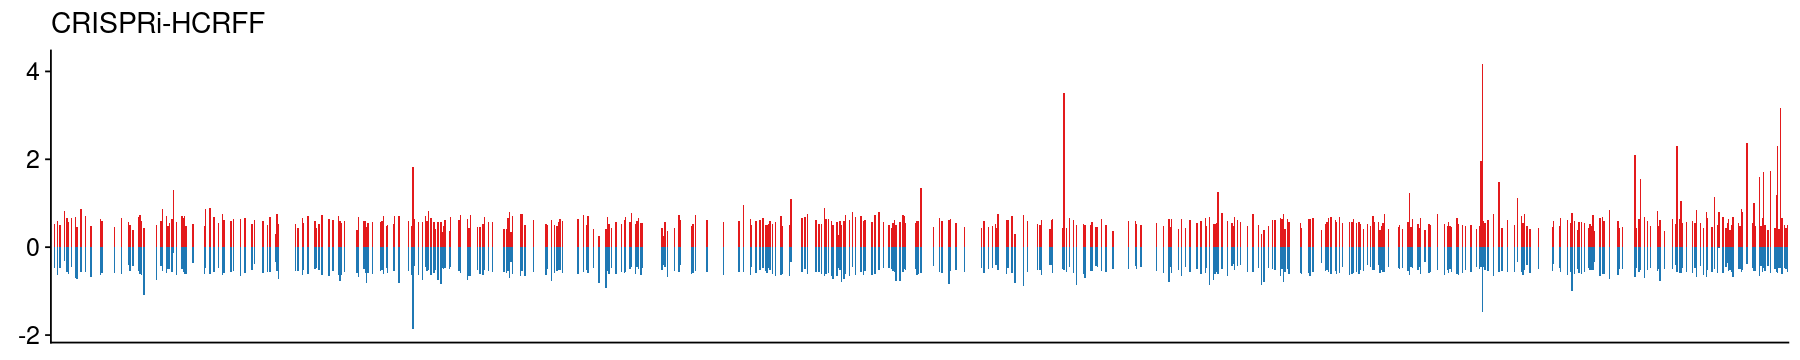

In [33]:
theme_fill = scale_fill_manual(
    values = c(
        "Mean_Pos"="#e31a1c", 
        "Mean_Neg"="#1f78b4")
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "plain", size = 17)
    #axis.title.y = element_text(size = 15)
)

theme_legend = theme(legend.position = "none")

dat = dat_region_score_chcrff_arrange

gpt = ggplot(dat, aes(x=Region, y=Score, fill=Group)) + 
    geom_col(width=1, position="identity") + 
    labs(title = "CRISPRi-HCRFF") +
    theme_cowplot() + 
    theme_text +
    theme_fill +
    theme_legend

gpt_score_chcrff = gpt

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)